# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather}&units={units}&q="

In [4]:
# Creating lists to store the data for each field
city_id_list = []
city_name_list = []
country_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()
    
    # Start the error handling
    # Retrieve the items for each field and append them to the empty lists  
    try:
        
        city_id = response_json['id']
        city_id_list.append(city_id)
            
        city_name = response_json['name']
        city_name_list.append(city_name)
        
        country_name = response_json['sys']['country']
        country_list.append(country_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("That record does not exist, searching for next record...")

City Name: lulea, City ID: 604490
That record does not exist, searching for next record...
City Name: butaritari, City ID: 2110227
City Name: busselton, City ID: 2075265
City Name: ponta do sol, City ID: 2264557
City Name: chokurdakh, City ID: 2126123
City Name: sao filipe, City ID: 3374210
City Name: faanui, City ID: 4034551
That record does not exist, searching for next record...
City Name: san quintin, City ID: 3984997
City Name: dikson, City ID: 1507390
City Name: ahipara, City ID: 2194098
City Name: vardo, City ID: 777019
City Name: touros, City ID: 3386213
City Name: aguimes, City ID: 2522325
City Name: hermanus, City ID: 3366880
City Name: castro, City ID: 3466704
City Name: bluff, City ID: 2206939
City Name: rikitea, City ID: 4030556
City Name: hithadhoo, City ID: 1282256
City Name: krasnopillya, City ID: 704343
City Name: vila velha, City ID: 3445026
City Name: mataura, City ID: 6201424
City Name: tuatapere, City ID: 2180815
City Name: jalu, City ID: 86049
City Name: jamestown

City Name: muravlenko, City ID: 1540711
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Name: broken hill, City ID: 2173911
City Name: mandera, City ID: 187896
City Name: airai, City ID: 1651810
City Name: lodja, City ID: 211647
City Name: college, City ID: 5859699
City Name: deputatskiy, City ID: 2028164
City Name: tazovskiy, City ID: 1489853
City Name: saint-philippe, City ID: 935215
City Name: kawalu, City ID: 1640902
City Name: kalmunai, City ID: 1242110
City Name: mumford, City ID: 2297810
City Name: daru, City ID: 2098329
That record does not exist, searching for next record...
City Name: dagana, City ID: 2246550
City Name: leh, City ID: 1264976
City Name: navalmoral de la mata, City ID: 2513324
City Name: bredasdorp, City ID: 1015776
City Name: pevek, City ID: 2122090
City Name: muzhi, City ID: 1498161
City Name: cayenne, City ID: 3382160
City Name: plouzane, City ID: 2986626
City Name: norman wells, City ID:

City Name: ayan, City ID: 2027316
City Name: tim, City ID: 482986
City Name: pervomayskiy, City ID: 510911
City Name: kitimat, City ID: 5993072
City Name: rawlins, City ID: 5836068
City Name: beaverlodge, City ID: 5896969
City Name: hun, City ID: 2216645
City Name: antofagasta, City ID: 3899539
That record does not exist, searching for next record...
City Name: egvekinot, City ID: 4031742
City Name: umba, City ID: 479071
City Name: beian, City ID: 3160100
City Name: khandyga, City ID: 2022773
City Name: santiago del estero, City ID: 3835869
City Name: tambura, City ID: 366444
City Name: arman, City ID: 2127060
City Name: bintulu, City ID: 1737486
City Name: margate, City ID: 2643044
City Name: thompson, City ID: 6165406
City Name: biryusinsk, City ID: 1510041
City Name: dubbo, City ID: 2168305
City Name: olafsvik, City ID: 3414079
City Name: ciudad bolivar, City ID: 3645532
City Name: plavinas, City ID: 456635
City Name: vrangel, City ID: 2013258
City Name: dire, City ID: 2458624
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the data into a dataframe
cities_df = pd.DataFrame({"City ID": city_id_list, "City": city_name_list, "Country": country_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})

cities_df.head()

,City ID,City,Country,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,604490,Luleå,SE,65.5842,22.1547,6.80,78,0,8.05
1,2110227,Butaritari,KI,3.0707,172.7902,81.07,77,99,15.79
2,2075265,Busselton,AU,-33.6500,115.3333,55.26,94,0,10.18
3,2264557,Ponta do Sol,PT,32.6667,-17.1000,62.47,73,60,1.99
4,2126123,Chokurdakh,RU,70.6333,147.9167,-10.08,88,13,7.38


In [6]:
# Export to .csv file
cities_df.to_csv("city_weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

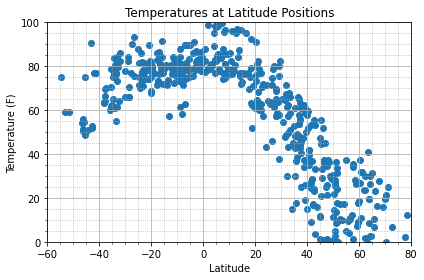

<Figure size 432x288 with 0 Axes>

In [7]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_temp.png")

## Latitude vs. Humidity Plot

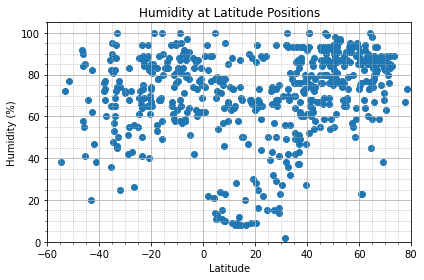

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_humid.png")

## Latitude vs. Cloudiness Plot

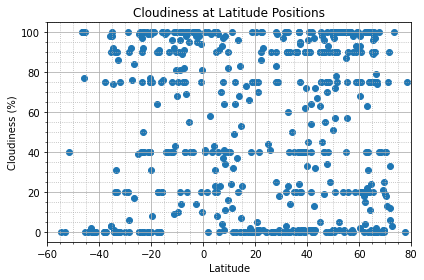

<Figure size 432x288 with 0 Axes>

In [9]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_clouds.png")

## Latitude vs. Wind Speed Plot

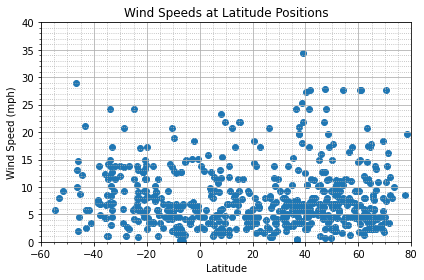

<Figure size 432x288 with 0 Axes>

In [10]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_wind.png")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

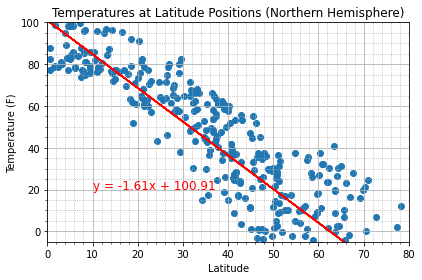

<Figure size 432x288 with 0 Axes>

In [12]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

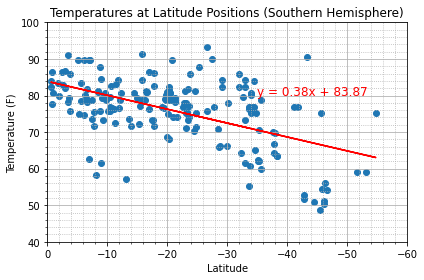

<Figure size 432x288 with 0 Axes>

In [13]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

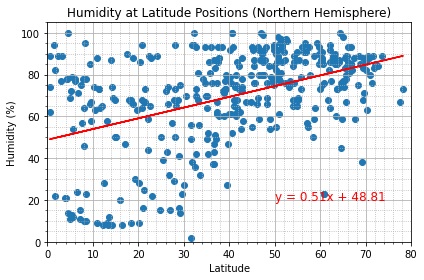

<Figure size 432x288 with 0 Axes>

In [14]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

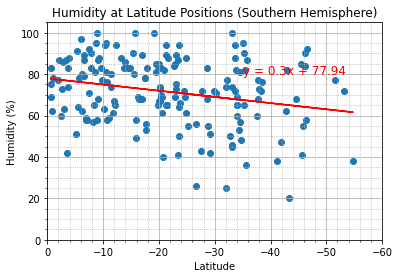

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

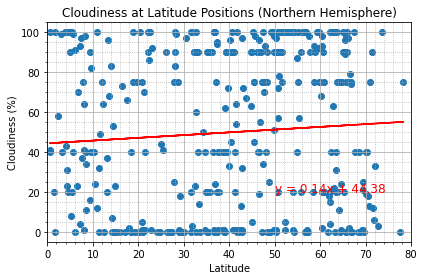

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_clouds_regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

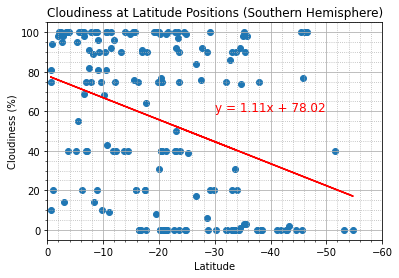

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Clouds"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_clouds_regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

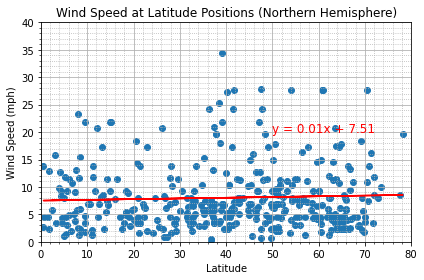

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/nh_lat_wind_regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

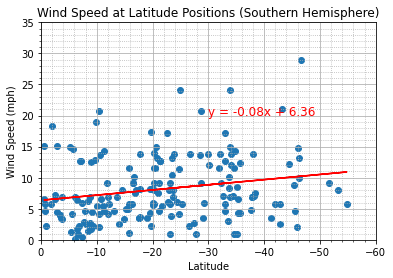

<Figure size 432x288 with 0 Axes>

In [19]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Images/sh_lat_wind_regression.png")